In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
or_data=pd.DataFrame()
and_data=pd.DataFrame()
xor_data=pd.DataFrame()

In [4]:
#or gate
or_data['input1']=[1,1,0,0]
or_data['input2']=[1,0,1,0]
or_data['output']=[1,1,1,0]
#and gate
and_data['input1']=[1,1,0,0]
and_data['input2']=[1,0,1,0]
and_data['output']=[1,0,0,0]
#xor gate
xor_data['input1']=[1,1,0,0]
xor_data['input2']=[1,0,1,0]
xor_data['output']=[1,0,0,1]

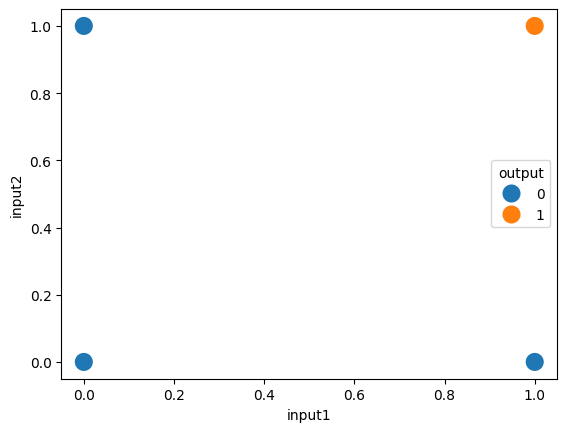

In [6]:
sns.scatterplot(data=and_data, x='input1', y='input2', hue='output', s=200)
plt.show()

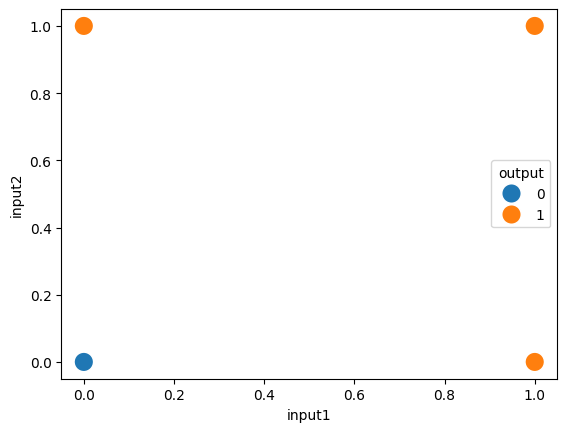

In [8]:
sns.scatterplot(data=or_data, x='input1', y='input2', hue='output', s=200)
plt.show()

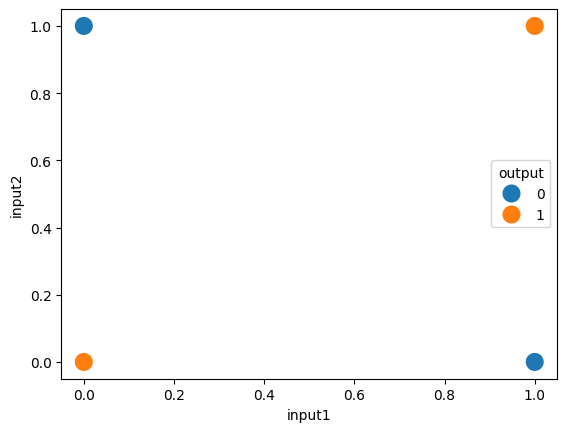

In [9]:
sns.scatterplot(data=xor_data, x='input1', y='input2', hue='output', s=200)
plt.show()

In [10]:
from sklearn.linear_model import Perceptron
clf1=Perceptron()
clf2=Perceptron()
clf3=Perceptron()

In [11]:
clf1.fit(and_data.iloc[:,0:2].values,and_data.iloc[:,-1].values)
clf2.fit(or_data.iloc[:,0:2].values,or_data.iloc[:,-1].values)
clf3.fit(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values)

Perceptron()

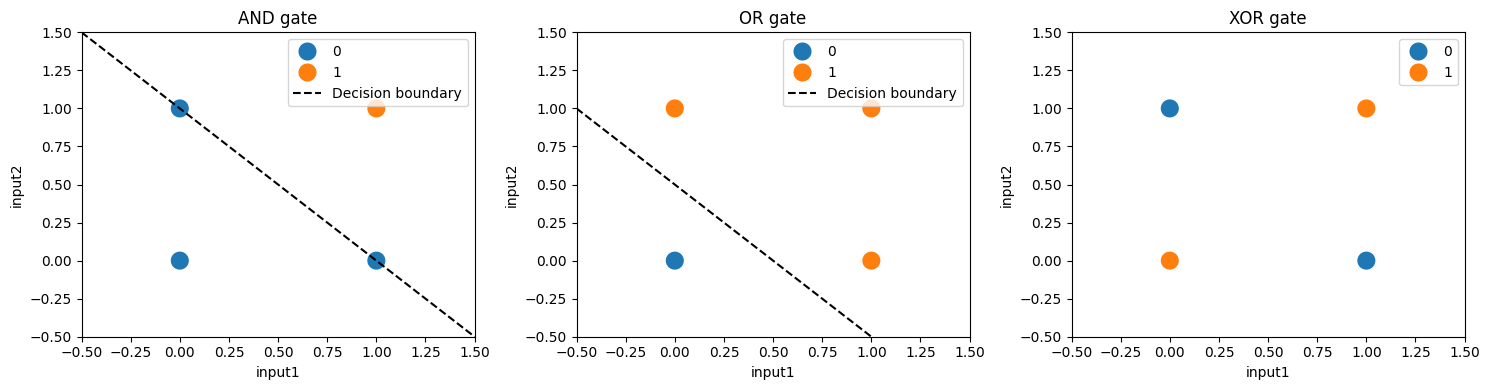

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
datasets = [
    ("AND", and_data, clf1),
    ("OR", or_data, clf2),
    ("XOR", xor_data, clf3),
]

for ax, (title, data, model) in zip(axes, datasets):
    sns.scatterplot(data=data, x="input1", y="input2", hue="output", s=200, ax=ax)
    w = model.coef_[0]
    b = model.intercept_[0]
    if w[1] != 0:
        x_vals = np.array([data["input1"].min() - 0.5, data["input1"].max() + 0.5])
        y_vals = -(w[0] * x_vals + b) / w[1]
        ax.plot(x_vals, y_vals, "k--", label="Decision boundary")
    ax.set_title(f"{title} gate")
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.legend()

plt.tight_layout()
plt.show()

**summary**
- Here for the non linear regions perceptron is unable to give non linear boundary such as for xor gate.